In [1]:
from sklearn.cluster import KMeans
from skimage.filters import threshold_otsu
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
!pwd

/content/drive/My Drive/Colab Notebooks


In [4]:
def Enhancement(image):
  image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  enhanced_image=image.copy()

  #sharp
  laplacian=cv2.Laplacian(enhanced_image, cv2.CV_64F, ksize=3)
  enhanced=cv2.convertScaleAbs(enhanced_image-laplacian)

  #clustering
  r,g,b=cv2.split(enhanced_image)
  img_hsv=cv2.cvtColor(enhanced_image, cv2.COLOR_RGB2HSV)
  h,s,v=cv2.split(img_hsv)
  img_gray=0.7*s+0.3*v
  x=img_gray.flatten().reshape(-1,1)
  kmeans=KMeans(n_clusters=2, n_init='auto')
  kmeans.fit(x)
  label=kmeans.predict(x)
  bin=label.reshape(img_gray.shape)
  enhanced_image[:,:,0]=r*bin
  enhanced_image[:,:,1]=g*bin
  enhanced_image[:,:,2]=b*bin
  enhanced_image=cv2.cvtColor(enhanced_image,cv2.COLOR_RGB2GRAY)

  #sobel
  sobelx=cv2.Sobel(enhanced_image, cv2.CV_64F,1,0, ksize=3)
  sobely=cv2.Sobel(enhanced_image, cv2.CV_64F,0,1, ksize=3)
  enhanced_image=np.sqrt(sobelx**2 + sobely**2)

  #Morphological
  kernel=np.ones((3,3), np.uint8)
  enhanced_image=cv2.dilate(enhanced_image, kernel, iterations=1)

  #otsu
  otsu=threshold_otsu(enhanced_image)
  enhanced_image=enhanced_image>otsu

  return enhanced_image

In [11]:
dataset_dir='/content/drive/MyDrive/Colab Notebooks/chess/Chess/'
train_data=[]
train_labels=[]

train_dir=os.path.join(dataset_dir, 'train')
for class_name in os.listdir(train_dir):
  class_dir=os.path.join(train_dir, class_name)
  for image_name in os.listdir(class_dir):
    image_path=os.path.join(class_dir, image_name)
    image=cv2.imread(image_path)
    image=cv2.resize(image,(200,200), interpolation=cv2.INTER_AREA)
    image=Enhancement(image)
    train_data.append(image.flatten())
    train_labels.append(class_name)

train_data=np.array(train_data)
train_labels=np.array(train_labels)

In [12]:
test_data=[]
test_labels=[]
test_dir=os.path.join(dataset_dir, 'test')
for class_name in os.listdir(test_dir):
  class_dir=os.path.join(test_dir, class_name)
  for image_name in os.listdir(class_dir):
    image_path=os.path.join(class_dir, image_name)
    image=cv2.imread(image_path)
    image=cv2.resize(image,(200,200), interpolation=cv2.INTER_AREA)
    image=Enhancement(image)
    test_data.append(image.flatten())
    test_labels.append(class_name)
test_data=np.array(test_data)
test_labels=np.array(test_labels)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(train_data, train_labels)
predictions=knn.predict(test_data)
accuracy=accuracy_score(test_labels, predictions)
print("Accuracy of KNN:", accuracy)

Accuracy of KNN: 0.4393939393939394


In [13]:
classifier=svm.SVC()
classifier.fit(train_data, train_labels)
y_pred=classifier.predict(test_data)
accuracy=accuracy_score(test_labels, y_pred)
print("Accuracy of SVM:", accuracy)

Accuracy of SVM: 0.3484848484848485


Predicted class: ['King']


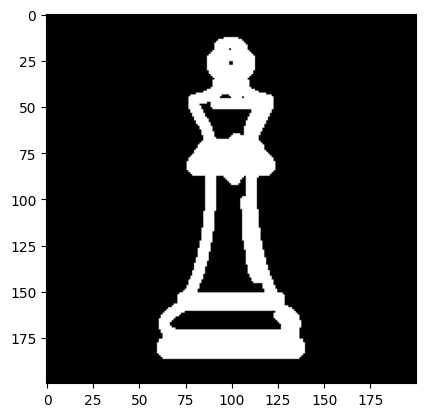

In [ ]:
image_path='/content/drive/MyDrive/Colab Notebooks/chess/Chess/predict/king.jpg'
image=cv2.imread(image_path)
image=cv2.resize(image,(200,200), interpolation=cv2.INTER_AREA)
image=Enhancement(image)
plt.imshow(image, cmap='gray')
image=image.flatten()
predicted_class=knn.predict([image])
print("Predicted class:", predicted_class)